### Aim : Implementing mulivariate linear regression in python

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# corrmat = data.corr()
# f, ax = plt.subplots(figsize=(12, 9))


# k = 3 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'MEDV')['MEDV'].index
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [32]:
prices = data['MEDV']
features = data.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'MEDV'], axis = 1)

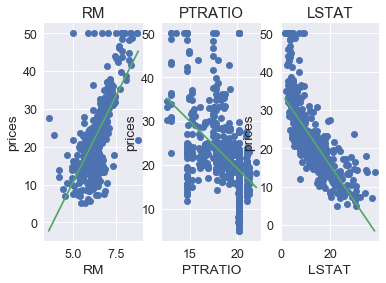

In [33]:
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [34]:
rm = data['RM'].values
ratio = data['PTRATIO'].values
lstat = data['LSTAT'].values
medv = data['MEDV'].values

m = len(rm)
x0 = np.ones(m)

X = np.array([x0, rm, lstat, ratio]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0])
Y = np.array(medv)
alpha = 0.0001

In [35]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(X, Y, B)
# print(inital_cost)

In [26]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history


In [37]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

[ 1.18360764  6.13753029 -0.49667126 -0.5959921 ]


In [38]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

5.310078293577669
0.665990526747571


## Using SKLEARN

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# X and Y Values
X = np.array([rm, lstat, ratio]).T
Y = np.array(medv)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print("RMSE: ", rmse)
print(reg.coef_)
print("Variance: ", r2)

RMSE:  7.924312096940944
[ 0.28725693 -0.28694071 -1.13521338]
Variance:  0.18890617580071523


### Conclusion: 
This dataset was taken from StatLib library which concerns housing values in suburbs of Boston.This dataset comprise of three features of which the correlation analysis is done using scatter plot with regression line fitting.We use a multivariate linear regression approach to find the 'MEDV' target variable.The RMSE value for our model turnsout to be 5.31 and from that of sklearn it turns out to be slightly lesser.From this we conclude that out model is fair as RMSE value is close to Zero.  